## Importing the required packages 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# importing the sampling techniques
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing the warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

In [2]:
# Plot the confusion matrix 
def plot_confusion_matrix(ax, cm, class_names, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)


In [3]:
# Plot the roc curve
def plot_roc_curve(ax, y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_roc = roc_auc_score(y_true, y_proba)
    ax.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {auc_roc:.2f})')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend()


# Classification report

Precision: Focuses on the quality of positive predictions. It’s about making sure that what you predict as positive is indeed positive.

Recall: Focuses on the completeness of positive predictions. It’s about making sure that you capture as many actual positives as possible.

F1 Score: Balances precision and recall. It’s useful when you need a single metric that takes both false positives and false negatives into account.

The importance of precision, recall, and F1 score depends on the specific application and the consequences of false positives and false negatives.


Example:

Imagine you’re developing a model to detect spam emails:

High Precision: Your model correctly identifies most spam emails, but it might miss some actual spam (low recall). You end up with fewer legitimate emails marked as spam, which is good for your inbox.

High Recall: Your model identifies almost all spam emails, but it also marks some legitimate emails as spam (low precision). You might end up with more legitimate emails in your spam folder.

High F1 Score: Your model strikes a balance, identifying most spam emails without too many false positives. You get a good mix of catching spam while minimizing mistakes.

In [4]:
# Confusion matrix, to print
def evaluate_model(y_true, y_pred, y_proba=None, title_prefix=''):
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a grid of subplots
    fig, axs = plt.subplots(1, 2 if y_proba is not None else 1, figsize=(16, 6))
    
    # Plot confusion matrix
    plot_confusion_matrix(axs[0], cm, class_names=['Not Fraud', 'Fraud'], title=f'{title_prefix} Confusion Matrix')
    
    if y_proba is not None:
        # Plot ROC curve
        plot_roc_curve(axs[1], y_true, y_proba, title=f'{title_prefix} ROC Curve')
    else:
        axs[1].axis('off')  # Hide the second subplot if no ROC data is provided
    
    # Print classification report
    print(f"Classification Report:")
    print(classification_report(y_true, y_pred))
    
    plt.tight_layout()
    plt.show()

In [5]:
# To read the csv
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# to get the unique of the classes 
df['Class'].unique()    

array([0, 1], dtype=int64)

In [7]:
# to print information
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Summary statistics for numerical features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# To get the count of the target classes
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

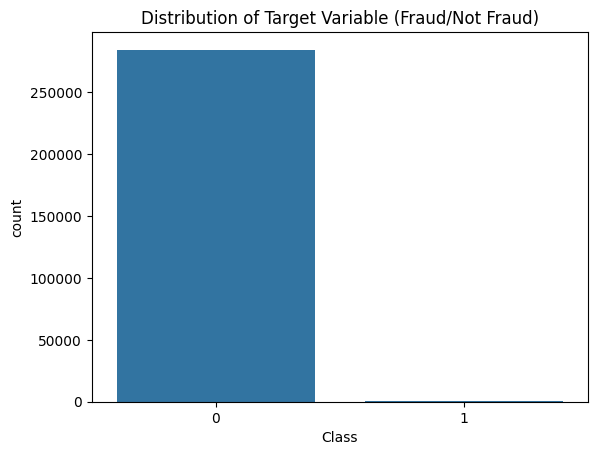

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [11]:
# Plotting the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable (Fraud/Not Fraud)')
plt.show()

# Displaying the percentage of each class
class_counts = df['Class'].value_counts(normalize=True) * 100
print(class_counts)

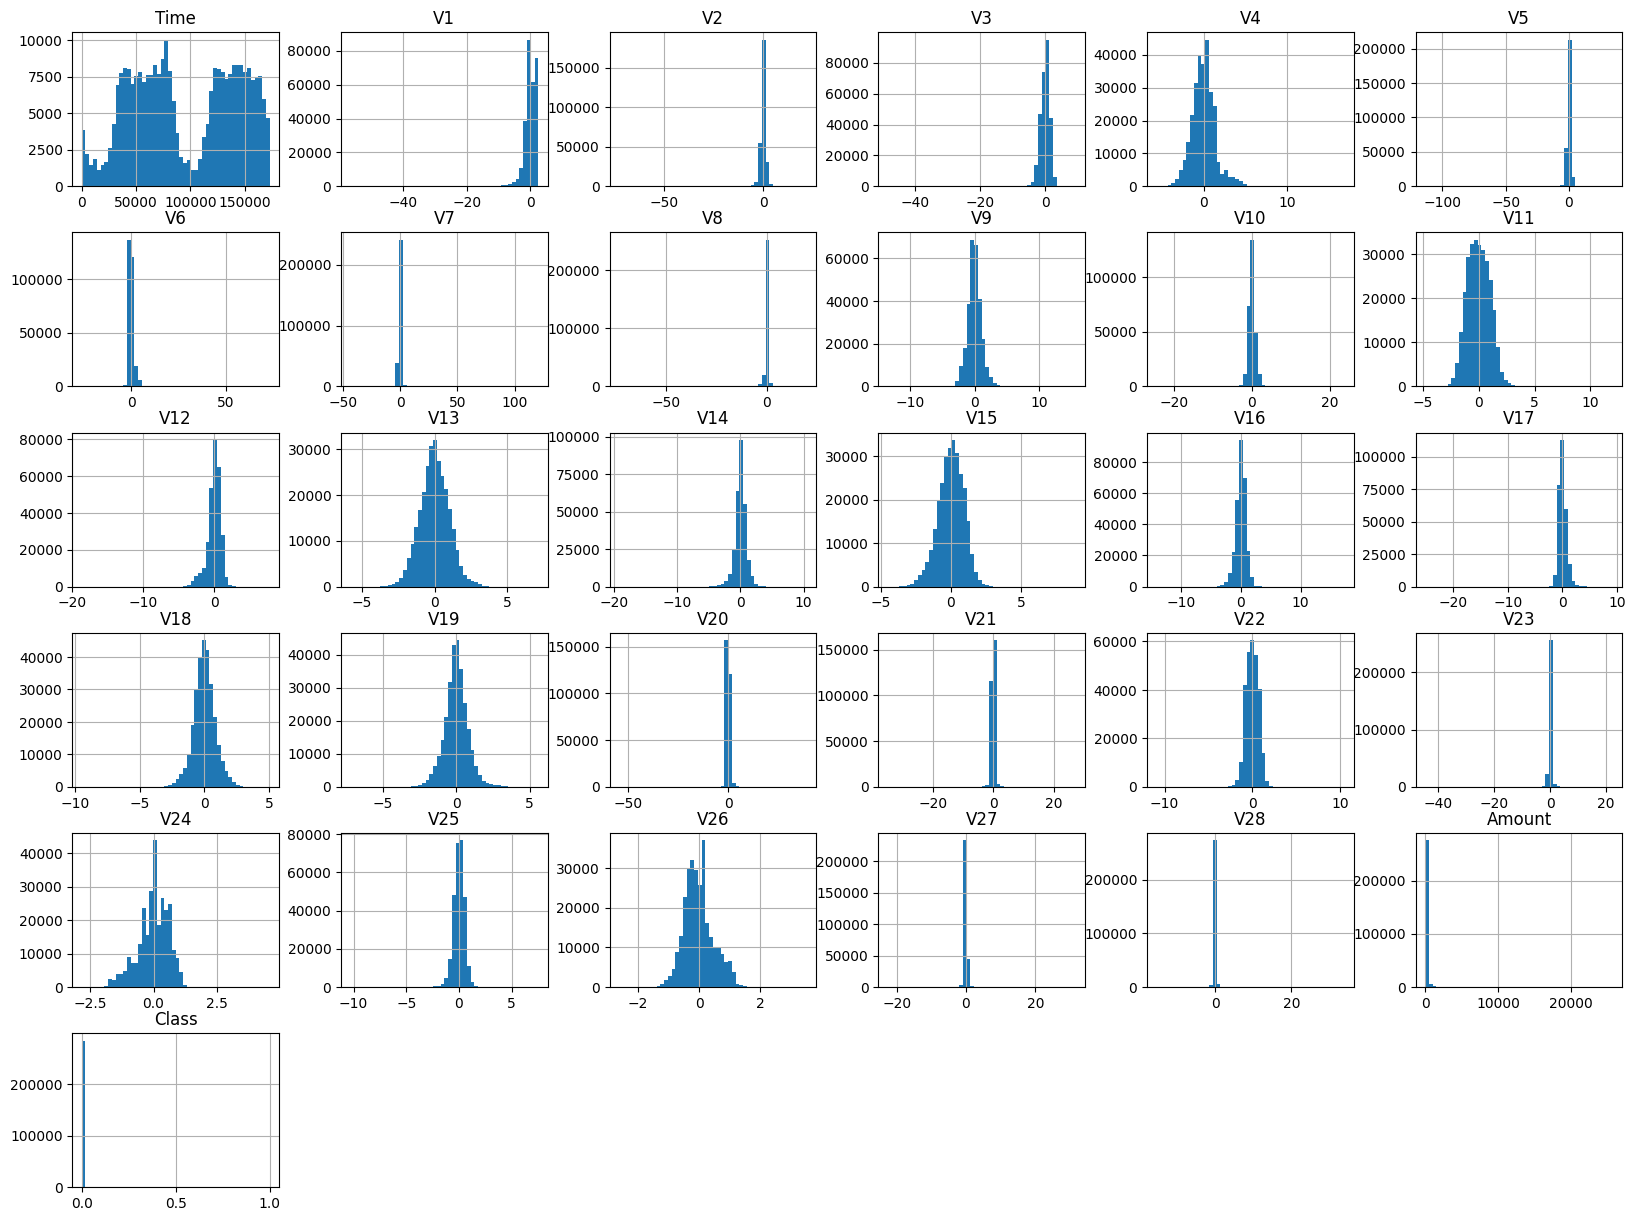

In [12]:
# Histogram for numerical features
df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
# numerical columns data, class weight to be assigned 
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
class_weight = {0: 1, 1: 5}

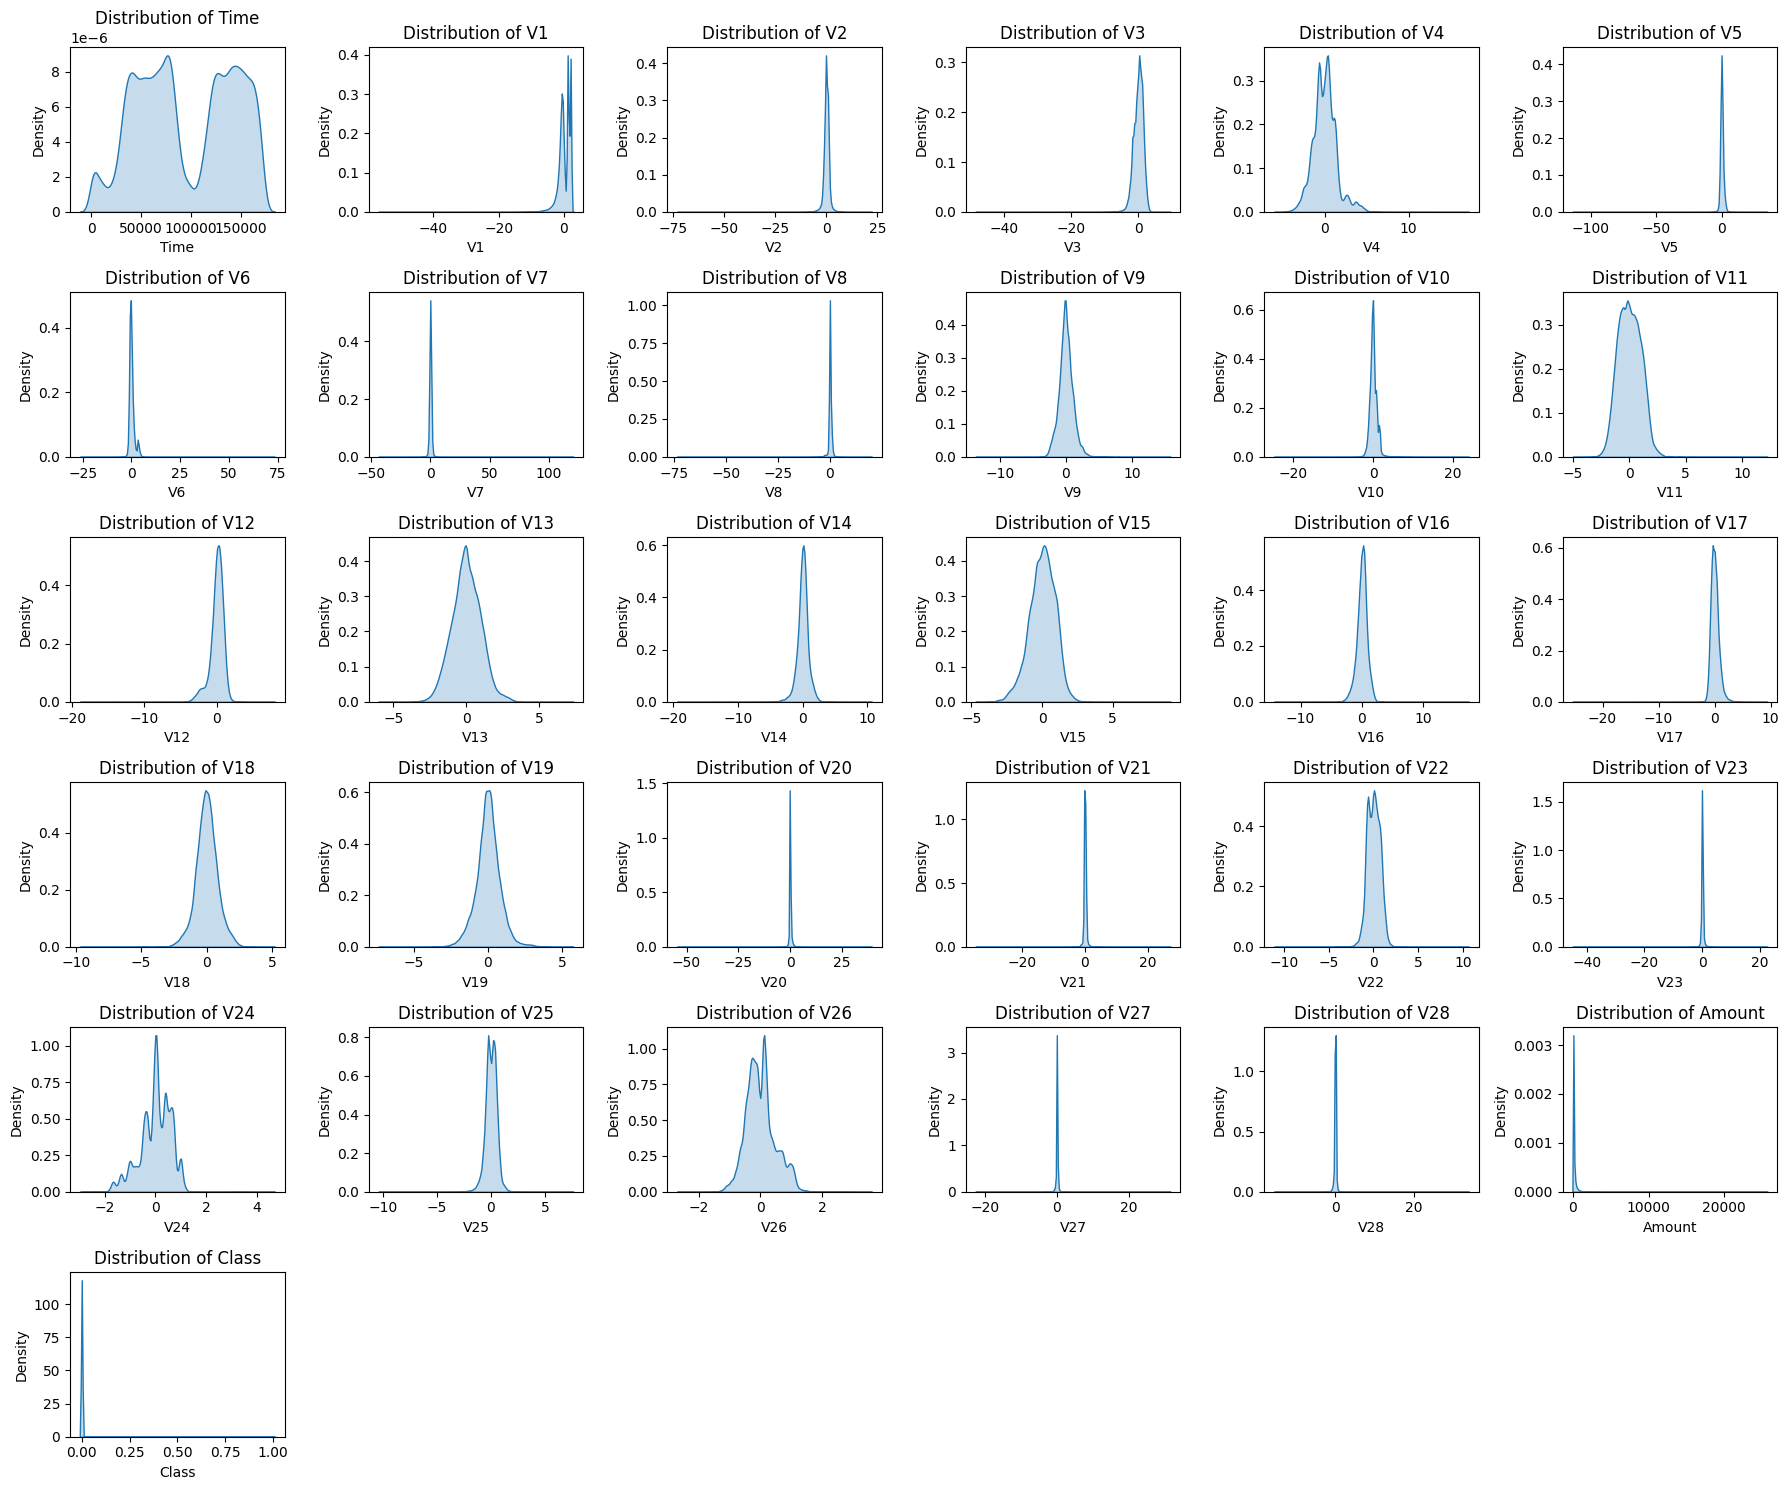

In [14]:
# Determine the number of rows and columns for the subplots grid
n_cols = 6  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, 2.5 * n_rows))  

# Flatten the axes array if there's more than one subplot
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column], shade=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

# To plot the correlation matrix

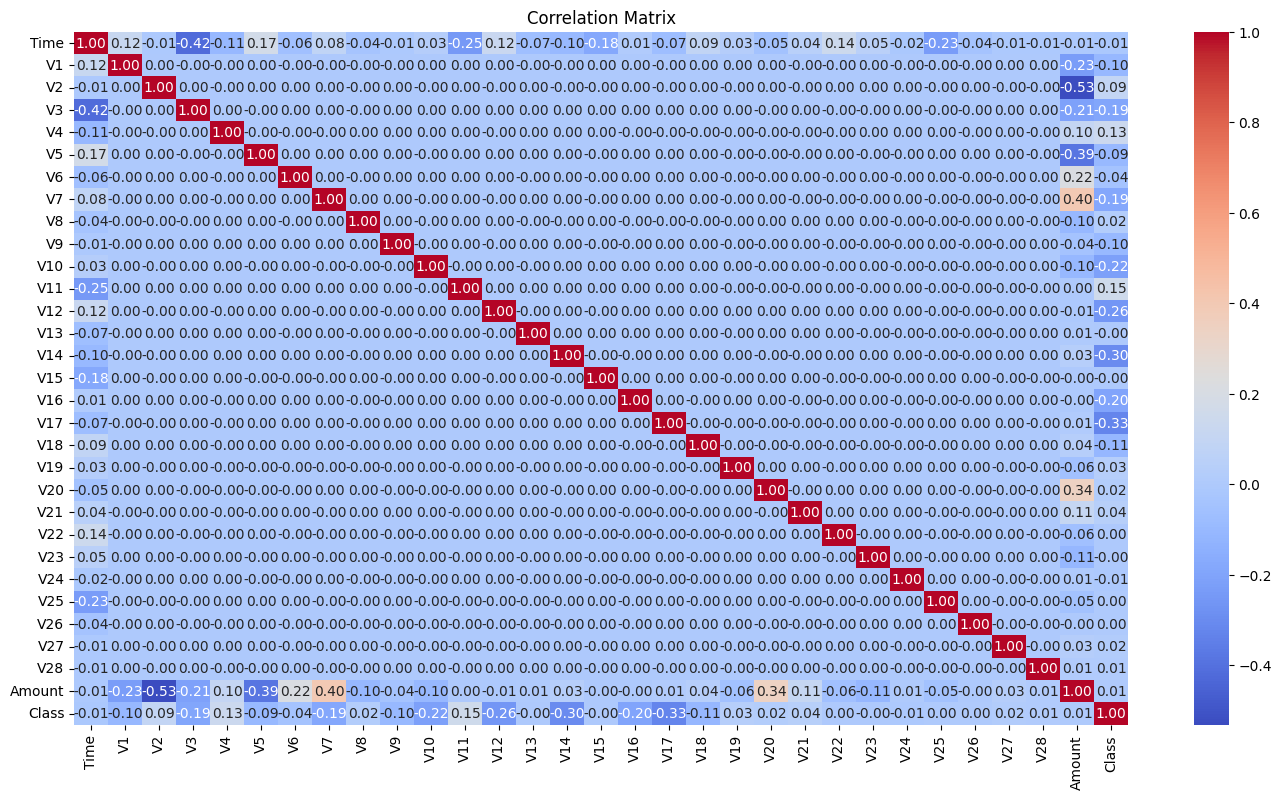

In [15]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(17, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# To check on the outliers 

In [16]:
# Compute Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)

# Identify outliers
outliers = (abs_z_scores > 3).all(axis=1)
outlier_rows = df[outliers]

In [17]:
outliers.unique()

array([False])

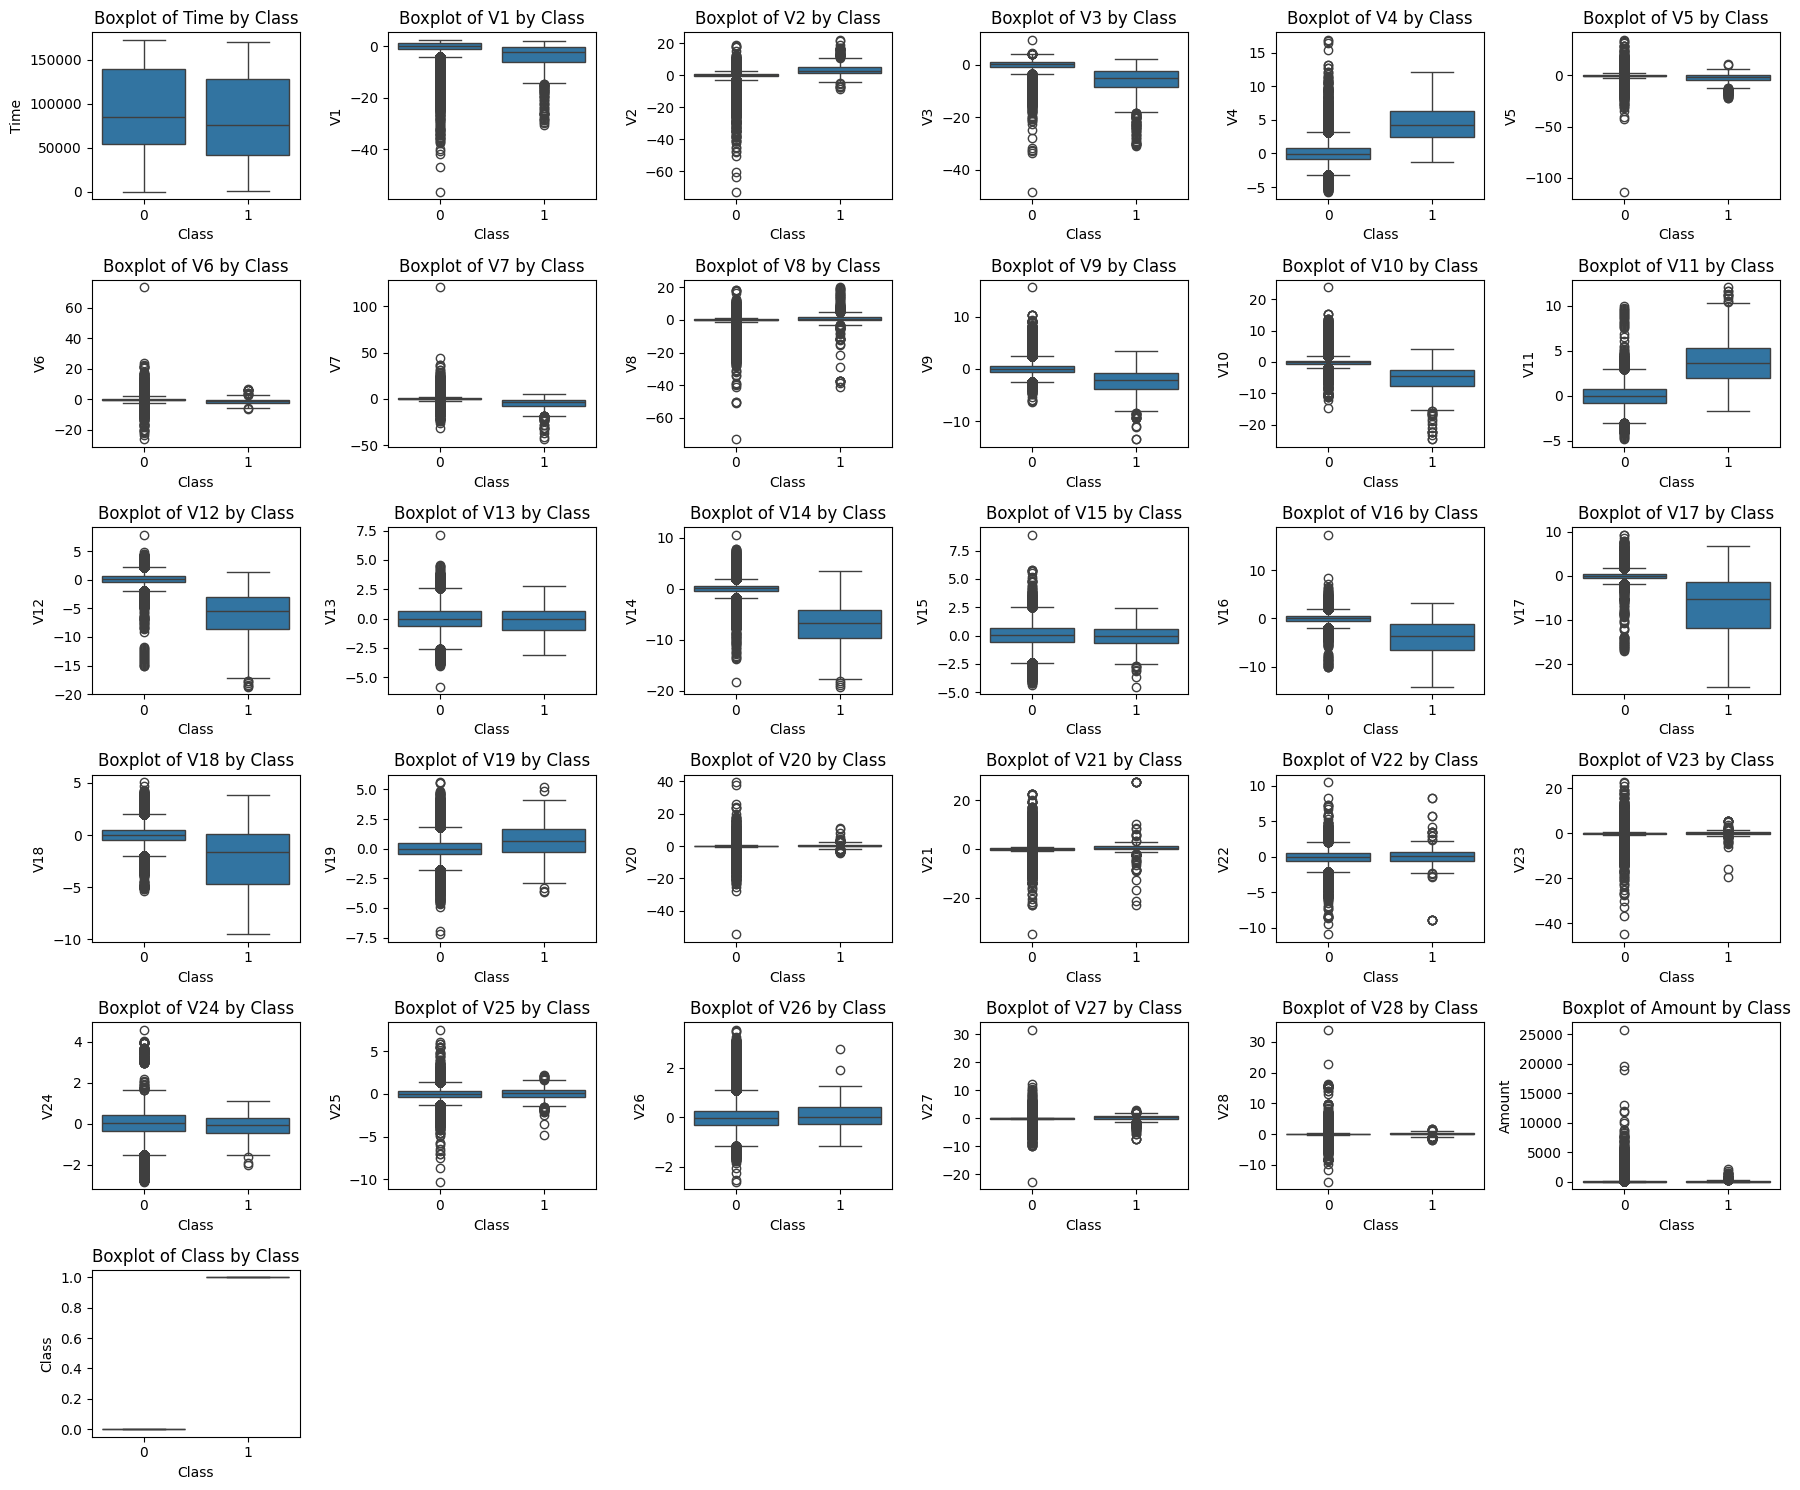

In [18]:
# Determine the number of rows and columns for the subplots grid
n_cols = 6  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create the subplots with smaller size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, 2.5 * n_rows))  

# Flatten the axes array if there's more than one subplot
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Class', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Class')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

# Train and test split

In [19]:
# Assuming 'df' is your dataframe and 'Class' is your target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Doing under sampling, 
Undersampling involves reducing the number of instances in the majority class to make the dataset more balanced. 
This is done by randomly selecting a subset of the majority class data points and removing the rest. 
The goal is to create a new dataset where the ratio of the majority to minority class instances is more balanced.

In [20]:
# Perform under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Doing over sampling,
Oversampling increases the number of samples in the minority class to make it more balanced with the majority class.

In [21]:
# Perform over-sampling
sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Logistic regression 

Logistic regression predicts the output of a categorical dependent variable.
The primary purpose of logistic regression is to model the probability of a binary outcome.
Logistic regression is widely used in many fields due to its simplicity, interpretability, and effectiveness in binary classification problems.


Plotting ruc curve, classification report and the confusion matrix
- The above plots have been done for original data, under sample data, over sample data [after fitting them]

Logistic Regression - Original Data
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.53      0.78      0.64       148

    accuracy                           1.00     85443
   macro avg       0.77      0.89      0.82     85443
weighted avg       1.00      1.00      1.00     85443



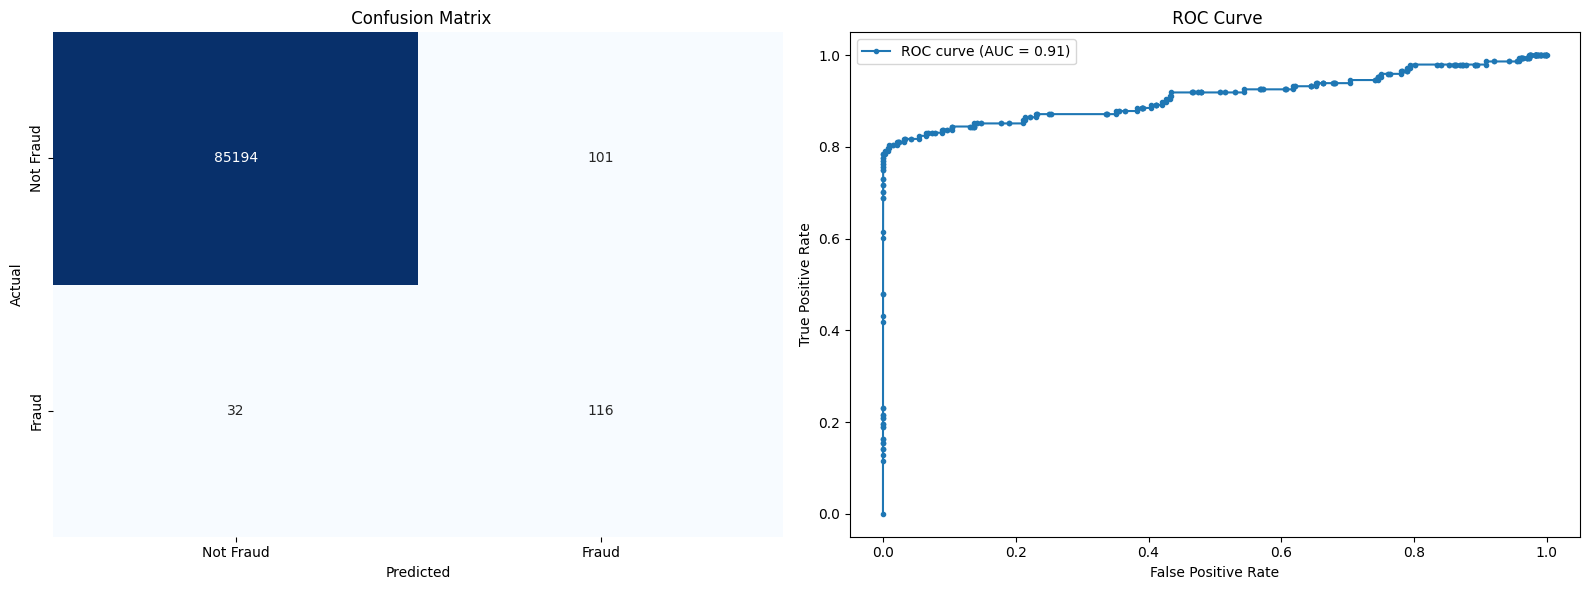

Logistic Regression - Under-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     85295
           1       0.01      0.91      0.02       148

    accuracy                           0.87     85443
   macro avg       0.51      0.89      0.48     85443
weighted avg       1.00      0.87      0.93     85443



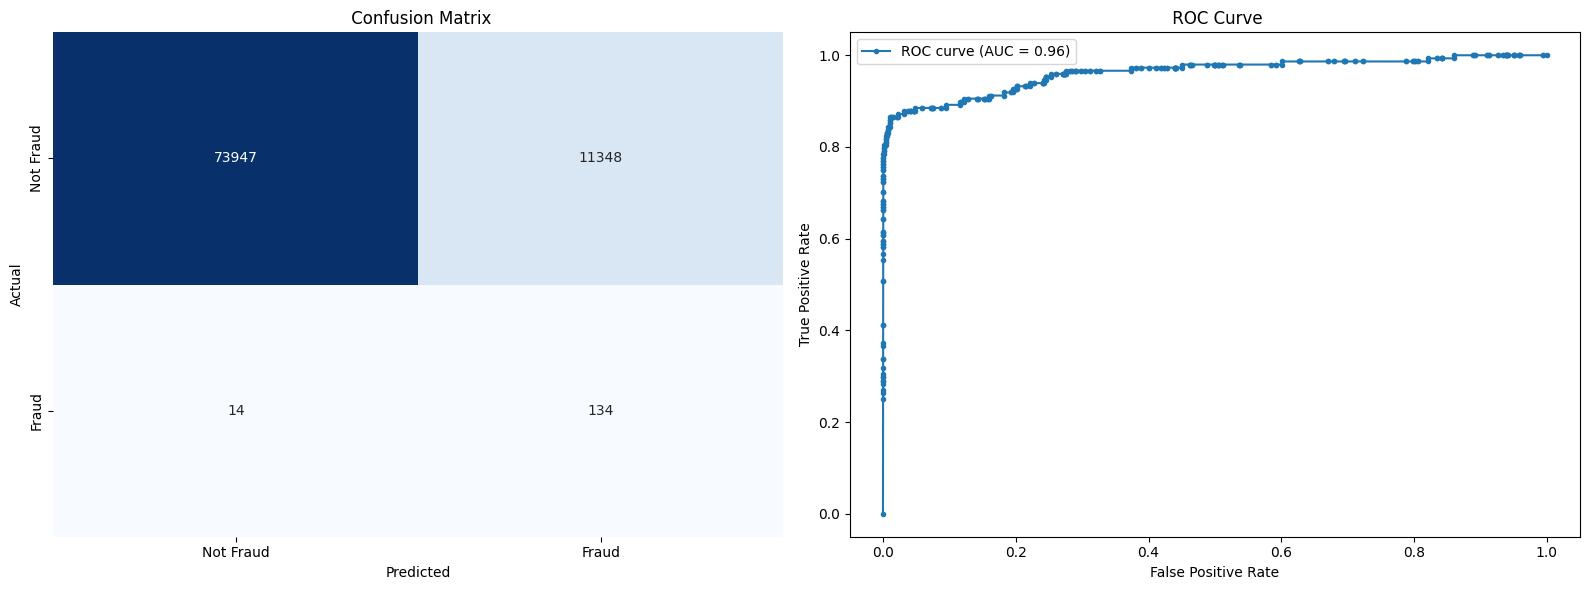

Logistic Regression - Over-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.88      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.91      0.51     85443
weighted avg       1.00      0.95      0.97     85443



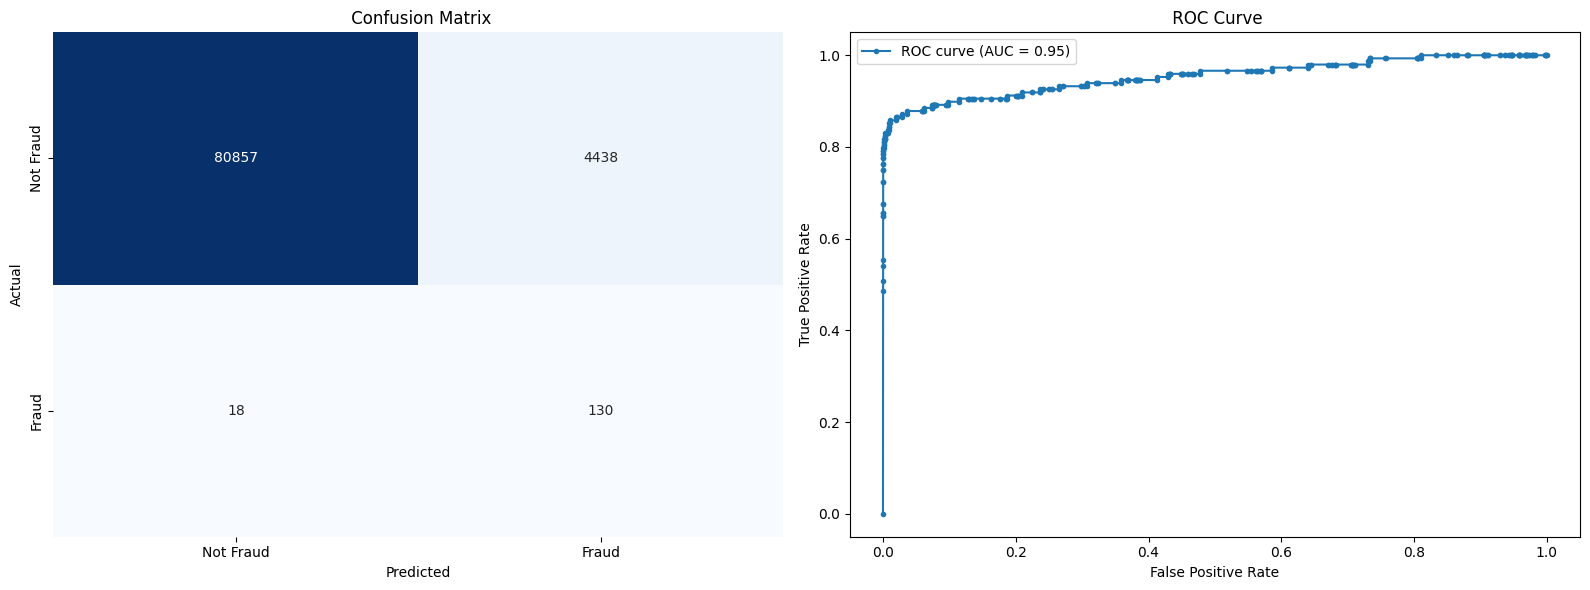

In [22]:
# Logistic Regression for original data
lr = LogisticRegression(class_weight=class_weight, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]
print("Logistic Regression - Original Data")
evaluate_model(y_test, y_pred, y_proba)

# Logistic Regression for under-sampled data
lr.fit(X_train_under, y_train_under)
y_pred_under = lr.predict(X_test)
y_proba_under = lr.predict_proba(X_test)[:, 1]
print("Logistic Regression - Under-sampling")
evaluate_model(y_test, y_pred_under, y_proba_under)

# Logistic Regression for over-sampled data
lr.fit(X_train_over, y_train_over)
y_pred_over = lr.predict(X_test)
y_proba_over = lr.predict_proba(X_test)[:, 1]
print("Logistic Regression - Over-sampling")
evaluate_model(y_test, y_pred_over, y_proba_over)

# KNN [k-nearest neighbors]

Uses proximity to make classifications or predictions about the grouping of an individual data point.
KNN is a type of instance-based learning, meaning it doesn't learn a model from the training data. 
Instead, it memorizes the training dataset and makes predictions based on it.

KNN is widely used in many practical applications, especially when the relationship between the features and the output is complex and not well understood.

Plotting ruc curve, classification report and the confusion matrix
- The above plots have been done for original data, under sample data, over sample data [after fitting them]

KNN - Original Data
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      0.02      0.04       148

    accuracy                           1.00     85443
   macro avg       1.00      0.51      0.52     85443
weighted avg       1.00      1.00      1.00     85443



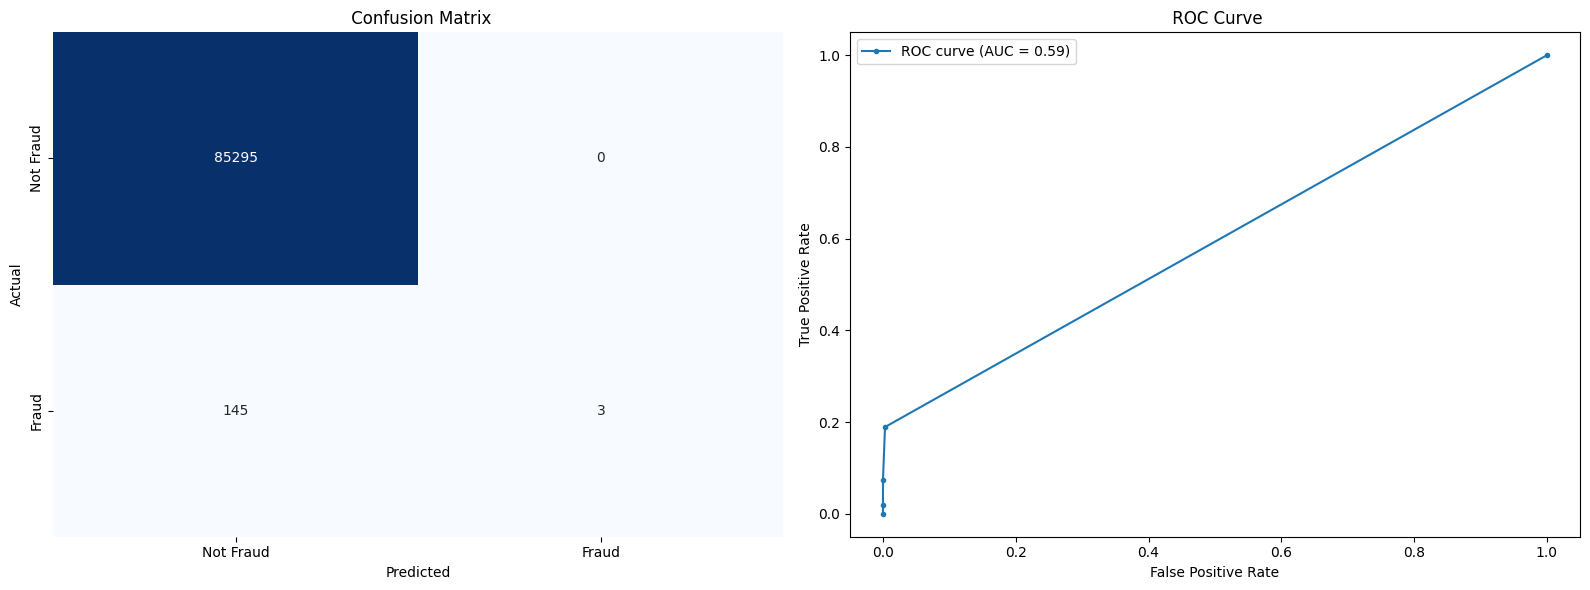

KNN - Under-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     85295
           1       0.00      0.64      0.01       148

    accuracy                           0.65     85443
   macro avg       0.50      0.64      0.40     85443
weighted avg       1.00      0.65      0.79     85443



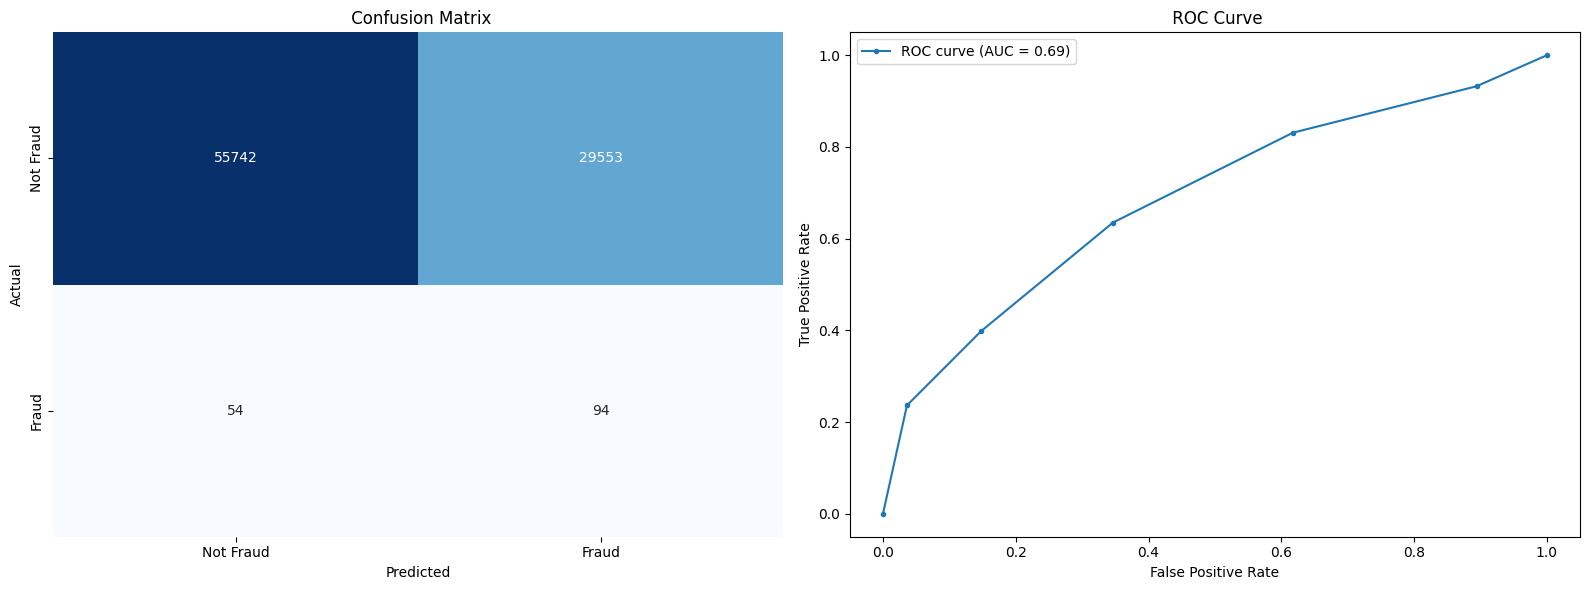

KNN - Over-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.01      0.47      0.03       148

    accuracy                           0.94     85443
   macro avg       0.51      0.71      0.50     85443
weighted avg       1.00      0.94      0.97     85443



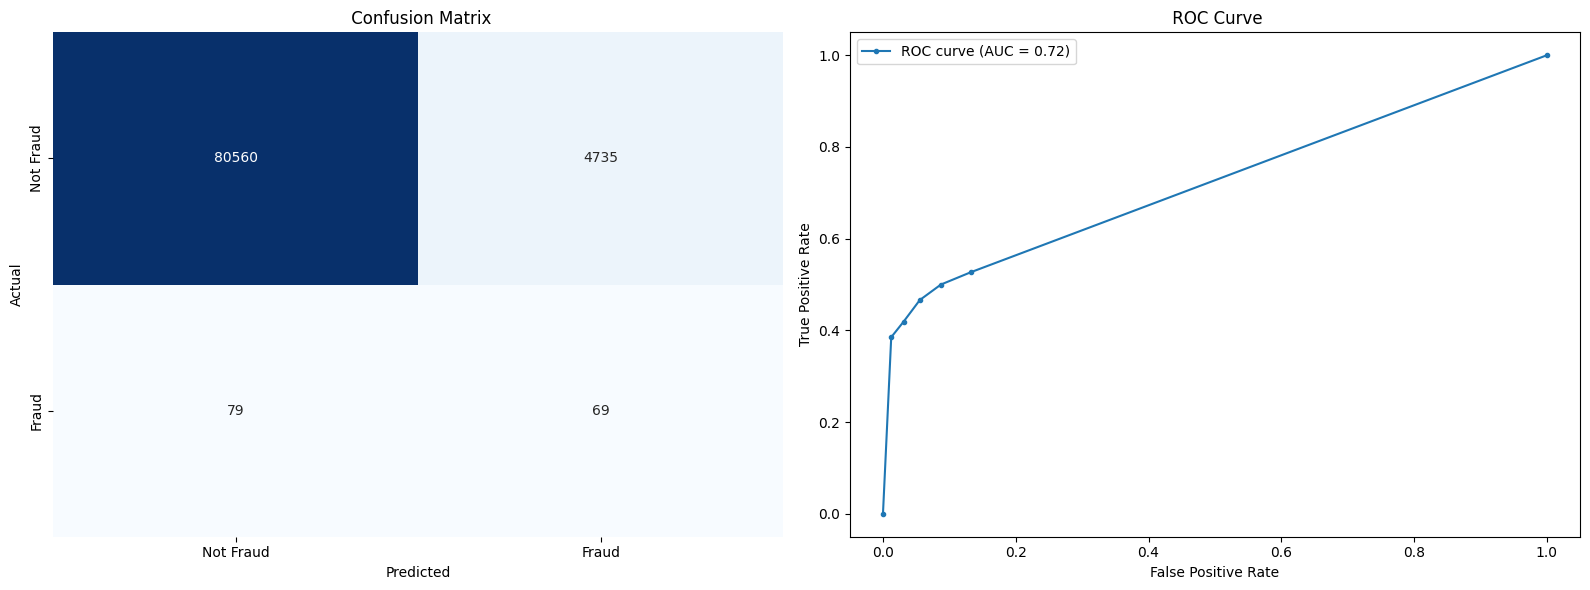

In [23]:
# KNN for original data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]
print("KNN - Original Data")
evaluate_model(y_test, y_pred, y_proba)

# KNN for under-sampled data
knn.fit(X_train_under, y_train_under)
y_pred_under = knn.predict(X_test)
y_proba_under = knn.predict_proba(X_test)[:, 1]
print("KNN - Under-sampling")
evaluate_model(y_test, y_pred_under, y_proba_under)

# KNN for over-sampled data
knn.fit(X_train_over, y_train_over)
y_pred_over = knn.predict(X_test)
y_proba_over = knn.predict_proba(X_test)[:, 1]
print("KNN - Over-sampling")
evaluate_model(y_test, y_pred_over, y_proba_over)

# Decision trees

A decision tree is a decision support hierarchical model that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.
It is structured like a tree, where each node represents a decision point or a test on an attribute, each branch represents the outcome of that test, and each leaf node represents a final decision or classification.

Plotting ruc curve, classification report and the confusion matrix
- The above plots have been done for original data, under sample data, over sample data [after fitting them]

Decision Tree - Original Data
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.66      0.71       148

    accuracy                           1.00     85443
   macro avg       0.88      0.83      0.85     85443
weighted avg       1.00      1.00      1.00     85443



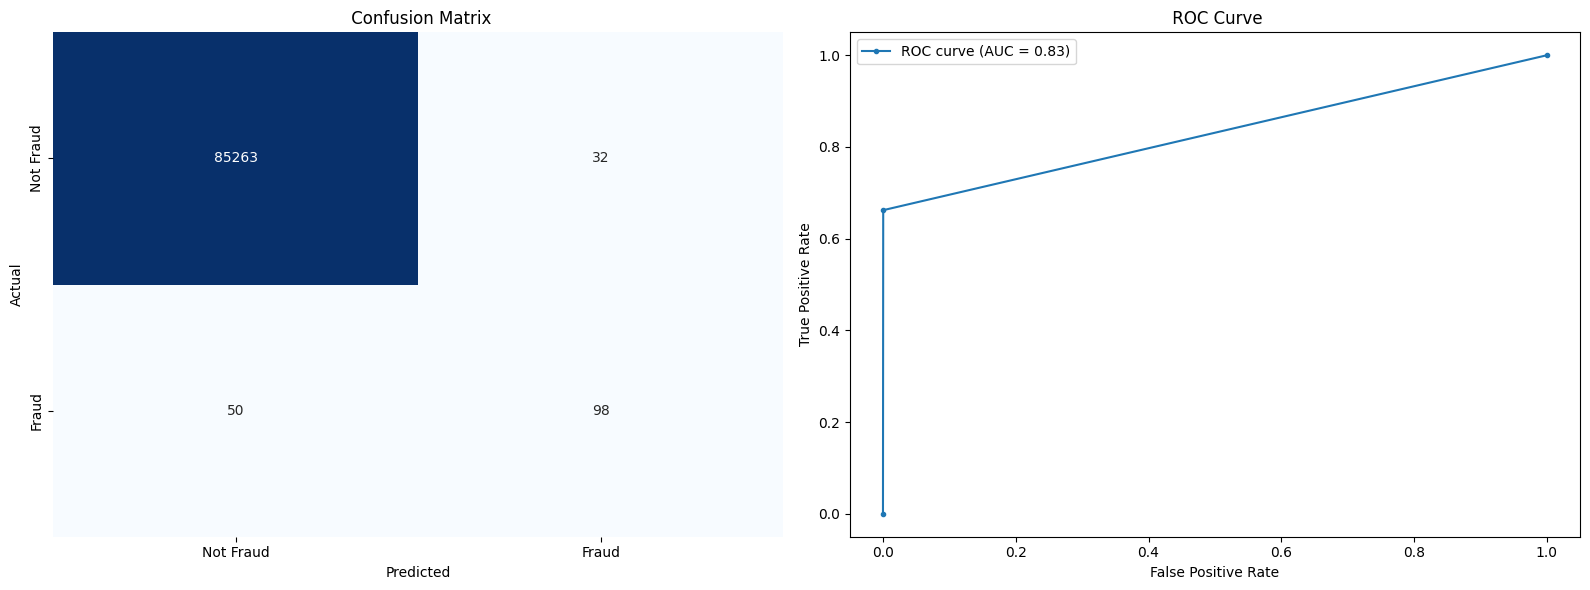

Decision Tree - Under-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96     85295
           1       0.02      0.88      0.03       148

    accuracy                           0.91     85443
   macro avg       0.51      0.90      0.49     85443
weighted avg       1.00      0.91      0.95     85443



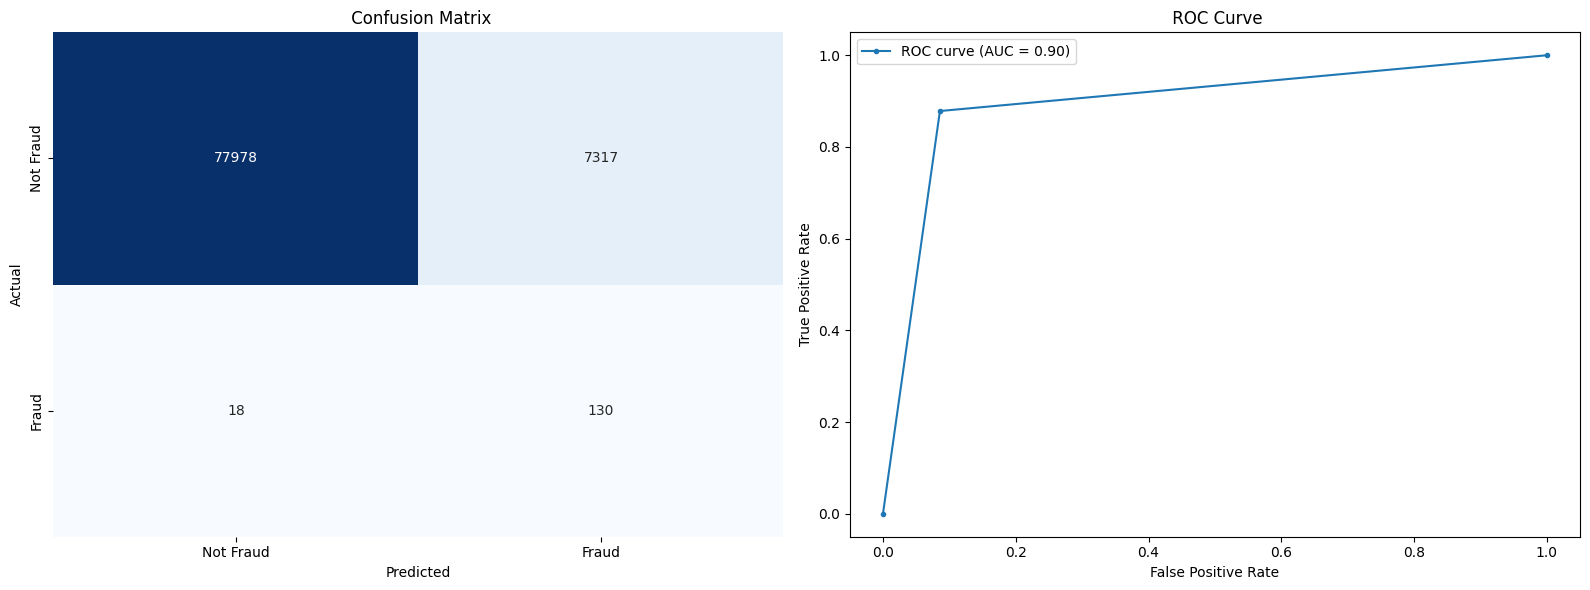

Decision Tree - Over-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.54      0.72      0.61       148

    accuracy                           1.00     85443
   macro avg       0.77      0.86      0.81     85443
weighted avg       1.00      1.00      1.00     85443



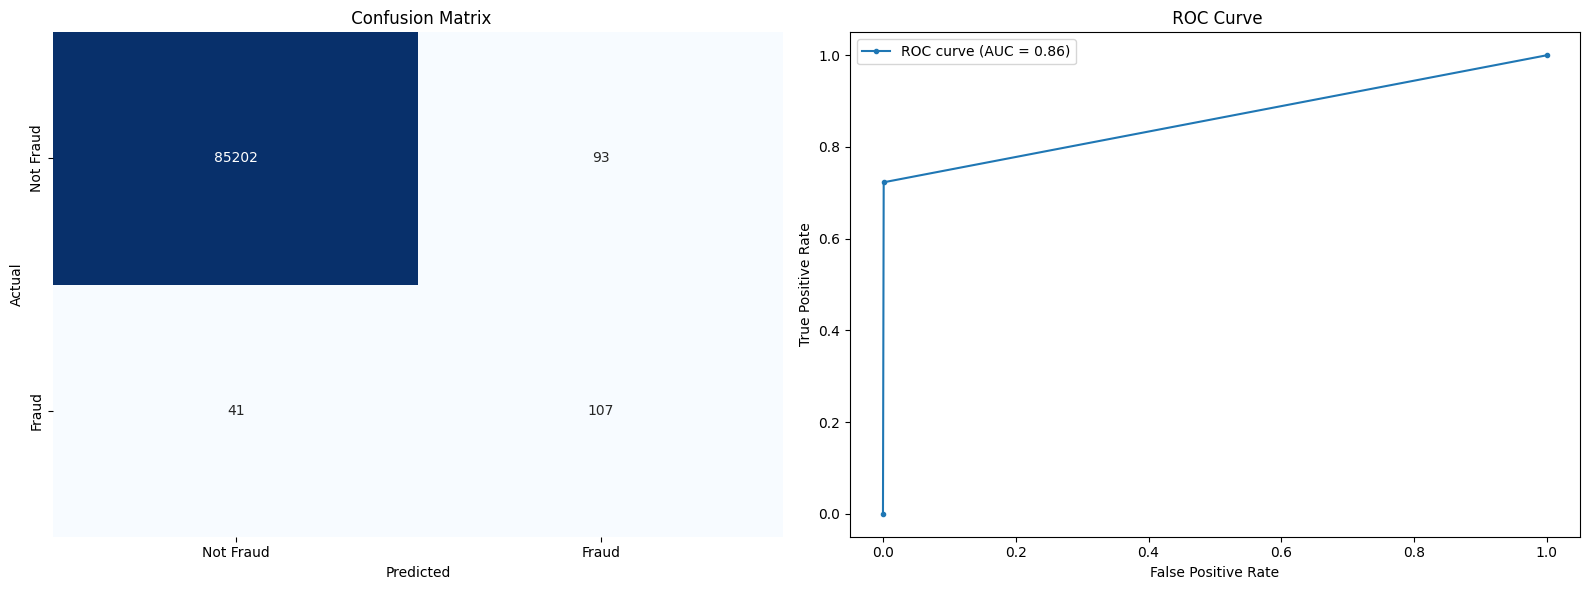

In [24]:
# Decision Tree for original data
dt = DecisionTreeClassifier(class_weight=class_weight, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]
print("Decision Tree - Original Data")
evaluate_model(y_test, y_pred, y_proba)

# Decision Tree for under-sampled data
dt.fit(X_train_under, y_train_under)
y_pred_under = dt.predict(X_test)
y_proba_under = dt.predict_proba(X_test)[:, 1]
print("Decision Tree - Under-sampling")
evaluate_model(y_test, y_pred_under, y_proba_under)

# Decision Tree for over-sampled data
dt.fit(X_train_over, y_train_over)
y_pred_over = dt.predict(X_test)
y_proba_over = dt.predict_proba(X_test)[:, 1]
print("Decision Tree - Over-sampling")
evaluate_model(y_test, y_pred_over, y_proba_over)

# Random forest classifier 

It is an ensemble learning method, which means it builds multiple decision trees during training and outputs the mode of the classes (for classification) of the individual trees.
Random forest is also a very handy algorithm because the default hyperparameters it uses often produce a good prediction result.

Each tree in the Random Forest is trained on a different subset of the training data, created by sampling with replacement (bootstrap sampling). This technique reduces variance and helps in improving the accuracy of the model.

Plotting ruc curve, classification report and the confusion matrix
- The above plots have been done for original data, under sample data, over sample data [after fitting them]

Random Forest - Original Data
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



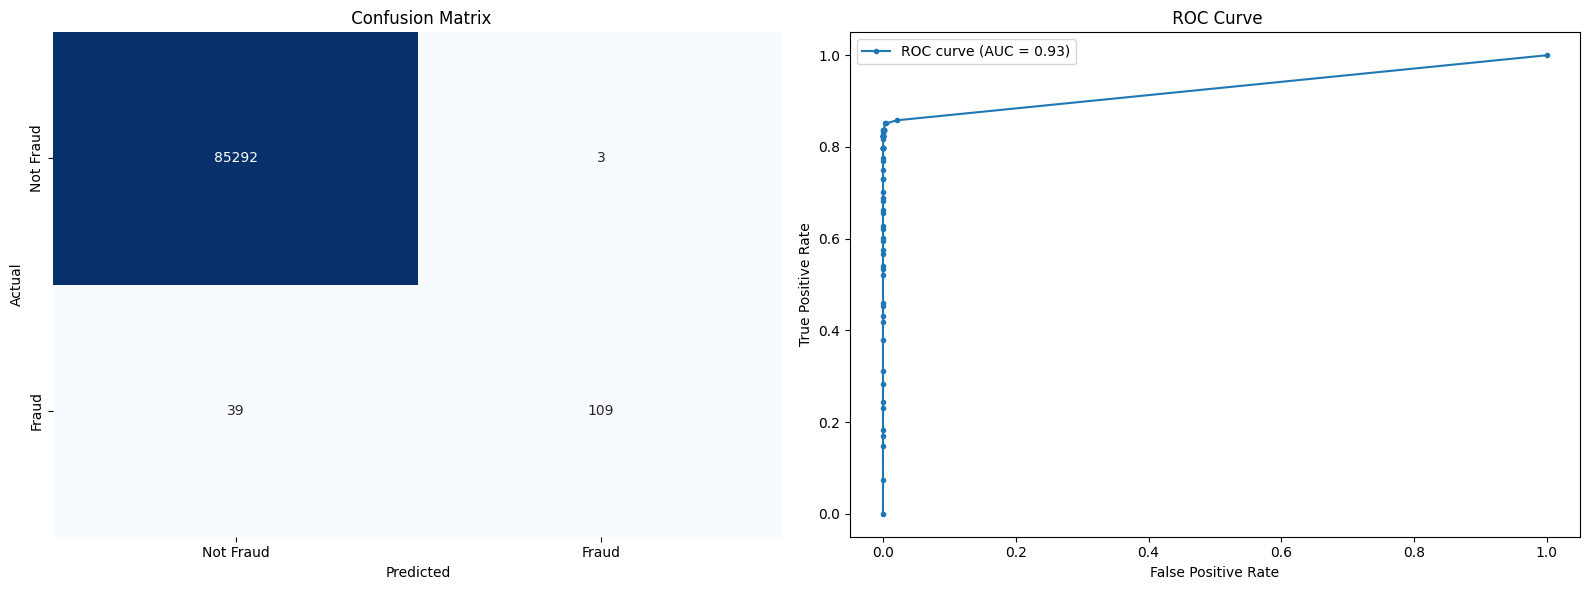

Random Forest - Under-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.85      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443



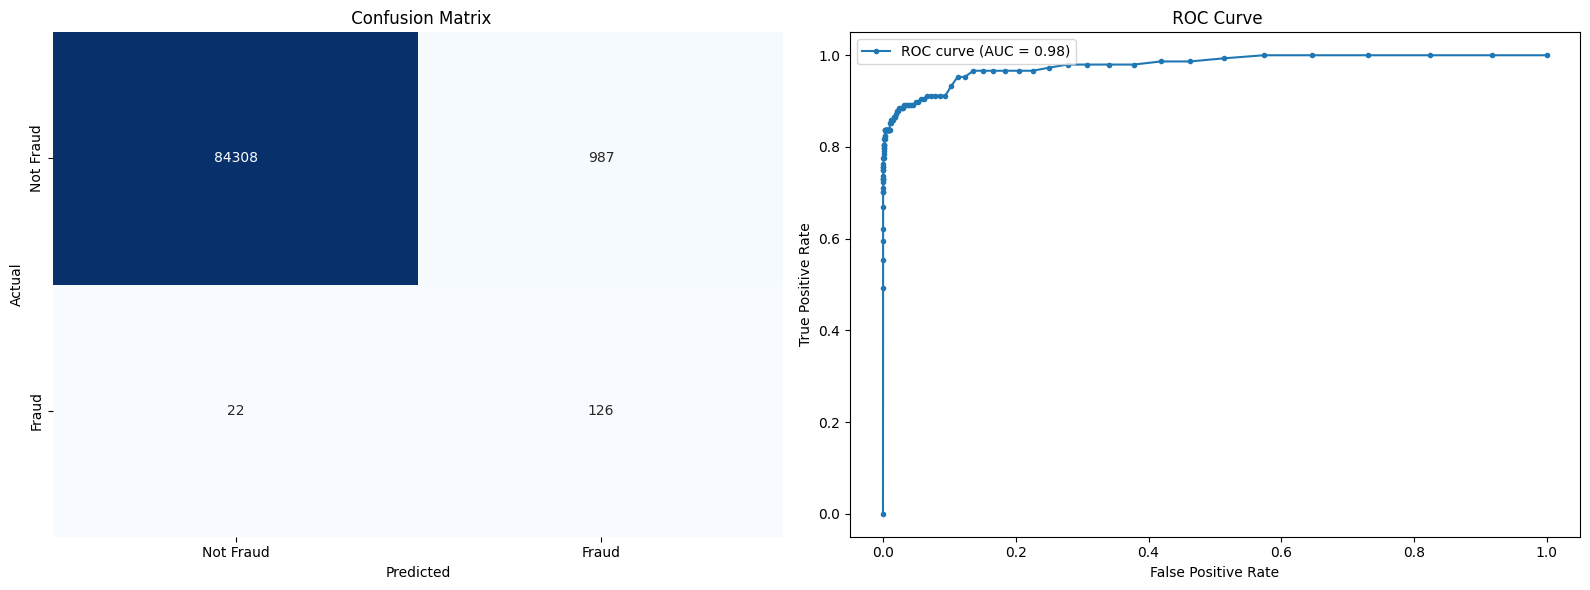

Random Forest - Over-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



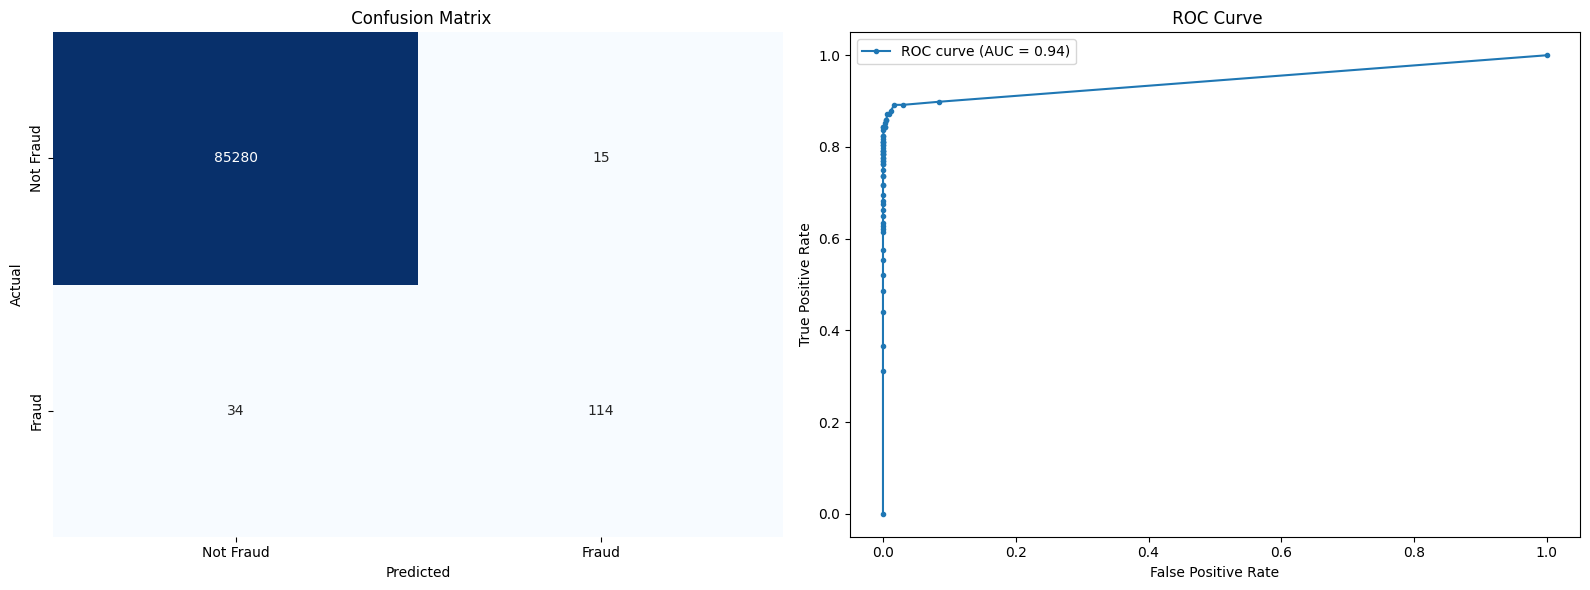

In [25]:
# Random Forest for original data
rf = RandomForestClassifier(class_weight=class_weight, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]
print("Random Forest - Original Data")
evaluate_model(y_test, y_pred, y_proba)

# Random Forest for under-sampled data
rf.fit(X_train_under, y_train_under)
y_pred_under = rf.predict(X_test)
y_proba_under = rf.predict_proba(X_test)[:, 1]
print("Random Forest - Under-sampling")
evaluate_model(y_test, y_pred_under, y_proba_under)

# Random Forest for over-sampled data
rf.fit(X_train_over, y_train_over)
y_pred_over = rf.predict(X_test)
y_proba_over = rf.predict_proba(X_test)[:, 1]
print("Random Forest - Over-sampling")
evaluate_model(y_test, y_pred_over, y_proba_over)

# Gradient Boosting

It builds an ensemble of models in a sequential manner, where each new model tries to correct the errors made by the previous ones.
The weak learners are models that perform slightly better than random guessing. In gradient boosting, these are usually shallow decision trees
Boosting refers to the method of converting weak learners into strong learners.

Understanding and effectively applying gradient boosting can significantly enhance the performance of predictive models.

Plotting ruc curve, classification report and the confusion matrix
- The above plots have been done for original data, under sample data, over sample data [after fitting them]

Gradient Boosting - Original Data
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.16      0.27       148

    accuracy                           1.00     85443
   macro avg       0.86      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443



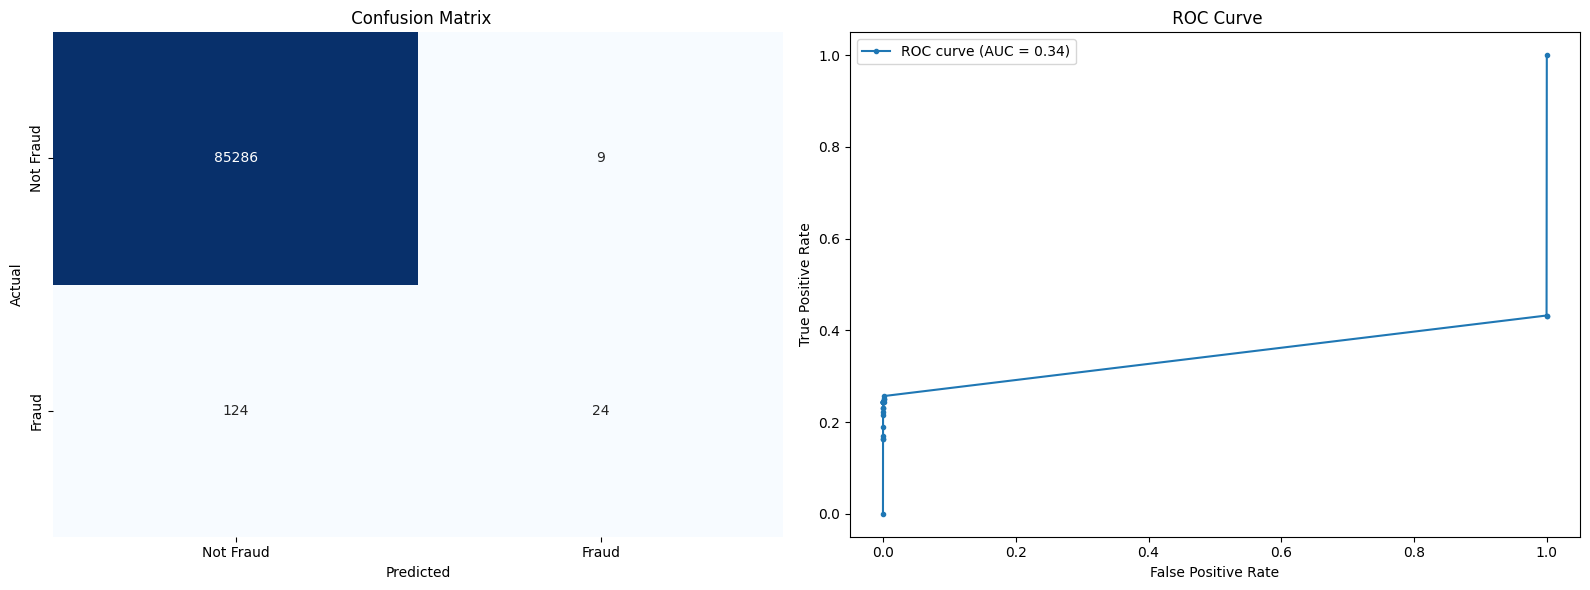

Gradient Boosting - Under-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.90      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



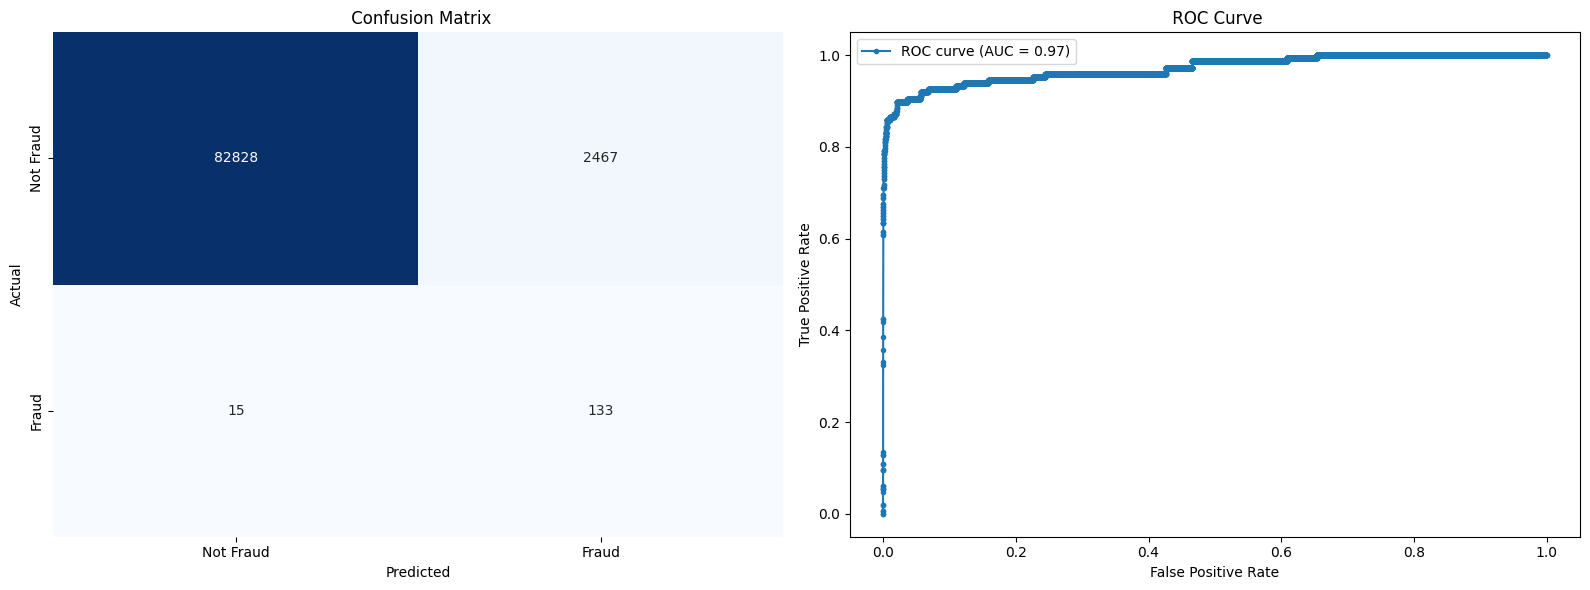

Gradient Boosting - Over-sampling
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.20      0.86      0.32       148

    accuracy                           0.99     85443
   macro avg       0.60      0.93      0.66     85443
weighted avg       1.00      0.99      1.00     85443



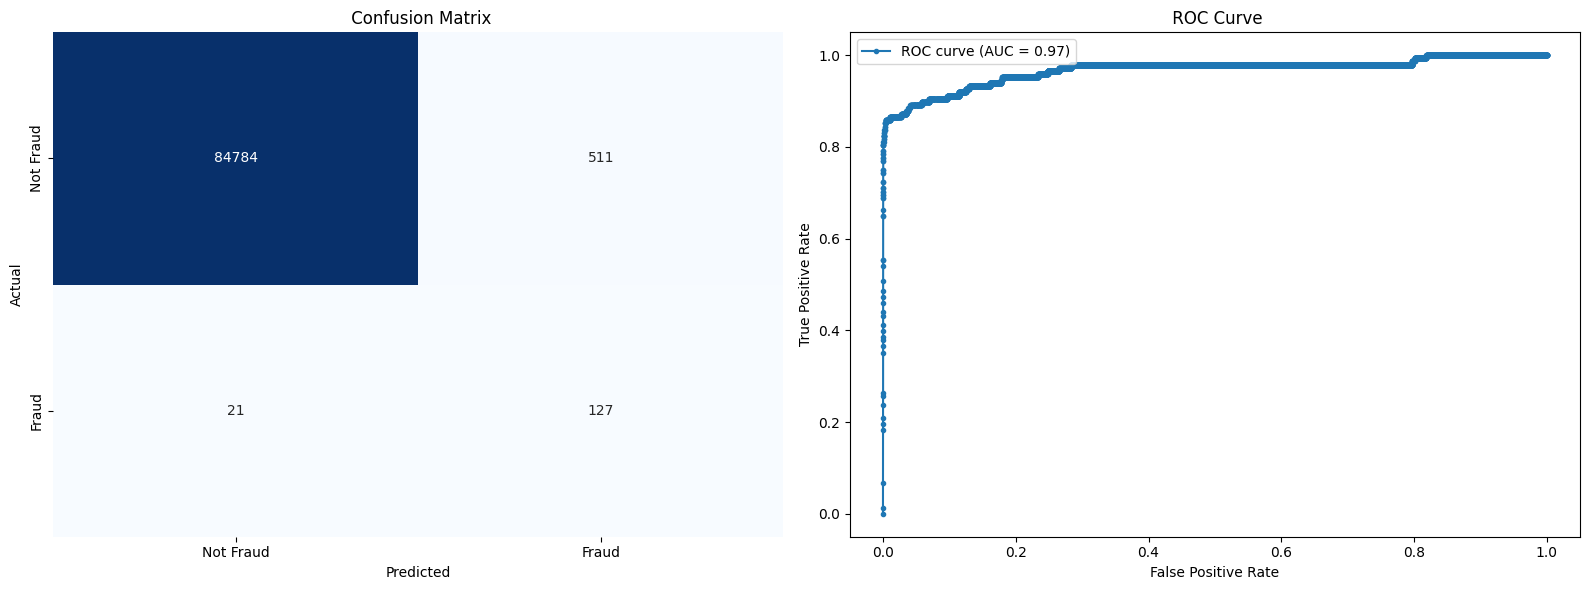

In [26]:
# Gradient Boosting for original data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_proba = gb.predict_proba(X_test)[:, 1]
print("Gradient Boosting - Original Data")
evaluate_model(y_test, y_pred, y_proba)

# Gradient Boosting for under-sampled data
gb.fit(X_train_under, y_train_under)
y_pred_under = gb.predict(X_test)
y_proba_under = gb.predict_proba(X_test)[:, 1]
print("Gradient Boosting - Under-sampling")
evaluate_model(y_test, y_pred_under, y_proba_under)

# Gradient Boosting for over-sampled data
gb.fit(X_train_over, y_train_over)
y_pred_over = gb.predict(X_test)
y_proba_over = gb.predict_proba(X_test)[:, 1]
print("Gradient Boosting - Over-sampling")
evaluate_model(y_test, y_pred_over, y_proba_over)